# Sakila DVD Rental Database - EDA

**Project:** Lab 1 
**Database:** Sakila (DVD rental store)  
**Tools:** DuckDB, Pandas, Python

## Purpose
Explore the Sakila database to provide insights about films, customers, rentals, and revenue.

## Methodology
This project was completed with support from LLM (Claude) for some code structuring and troubleshooting. All code has been written and understood by me.

In [1]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

In [20]:
# Function to run SQL queries against DuckDB
def query_sakila(query: str, duckdb_path="../data/sakila.duckdb"):
    """
    Run a SQL query against the Sakila DuckDB database.
    
    Parameters:
    -----------
    query : str
        SQL query to execute
    duckdb_path : str
        Path to the DuckDB database
        
    Returns:
    --------
    pandas.DataFrame
        Query result
    """
    with duckdb.connect(duckdb_path) as conn:
        df = conn.sql(query).df()
    return df

In [3]:
# Test that the connection works
test_query = """
SELECT COUNT(*) as total_tables
FROM information_schema.tables
WHERE table_schema = 'main'
"""

result = query_sakila(test_query)
print(f"Number of tables in database: {result['total_tables'].iloc[0]}")

Number of tables in database: 16


## Task 1: Exploratory Data Analysis (EDA)

### a) Films longer than 3 hours

Which films are longer than 180 minutes? 

In [4]:
# Query for films longer than 180 minutes
query_1a = """
SELECT 
    title,
    length
FROM film
WHERE length > 180
ORDER BY length DESC
"""

long_movies = query_sakila(query_1a)
long_movies

,title,length
0,WORST BANGER,185
1,CHICAGO NORTH,185
2,CONTROL ANTHEM,185
3,DARN FORRESTER,185
4,SWEET BROTHERHOOD,185
5,GANGS PRIDE,185
6,HOME PITY,185
7,SOLDIERS EVOLUTION,185
8,POND SEATTLE,185
9,MUSCLE BRIGHT,185


In [5]:
# Show the 10 longest films
print(f"Total number of films longer than 180 minutes: {len(long_movies)}")

Total number of films longer than 180 minutes: 39


**Observation:** There are 39 films longer than 3 hours. Several films share first place with 185 minutes, including "WORST BANGER", "CHICAGO NORTH", and "CONTROL ANTHEM".

### b) Films with "love" in the title

Which films have the word "love" in their title? 

In [6]:
# Query for films with "love" in the title
query_1b = """
SELECT 
    title,
    rating,
    length,
    description
FROM film
WHERE title ILIKE '%love%'
ORDER BY title
"""

love_movies = query_sakila(query_1b)
print(f"Total number of films with 'love' in the title: {len(love_movies)}")

Total number of films with 'love' in the title: 10


### c) Descriptive statistics for film length

Calculate shortest, average, median, and longest film length.

In [7]:
# Query for descriptive statistics on length
query_1c = """
SELECT 
    MIN(length) AS shortest,
    ROUND(AVG(length), 2) AS average,
    MEDIAN(length) AS median,
    MAX(length) AS longest
FROM film
"""

length_stats = query_sakila(query_1c)
length_stats

,shortest,average,median,longest
0,46,115.27,114.0,185


**Observation:** Film lengths vary between 46 and 185 minutes. Average film length is approximately 115 minutes (almost 2 hours), and median is 114 minutes, which indicates a fairly symmetrical distribution.

### d) Most expensive films to rent per day

What are the 10 most expensive films to rent per day? 

In [8]:
# Query for most expensive films per day
query_1d = """
SELECT 
    title,
    rental_rate,
    rental_duration,
    ROUND(rental_rate / rental_duration, 2) AS cost_per_day
FROM film
ORDER BY cost_per_day DESC
LIMIT 10
"""

expensive_movies = query_sakila(query_1d)
expensive_movies

,title,rental_rate,rental_duration,cost_per_day
0,ACE GOLDFINGER,4.99,3,1.66
1,AMERICAN CIRCUS,4.99,3,1.66
2,AUTUMN CROW,4.99,3,1.66
3,BACKLASH UNDEFEATED,4.99,3,1.66
4,BEAST HUNCHBACK,4.99,3,1.66
5,BEHAVIOR RUNAWAY,4.99,3,1.66
6,BILKO ANONYMOUS,4.99,3,1.66
7,CARIBBEAN LIBERTY,4.99,3,1.66
8,CASPER DRAGONFLY,4.99,3,1.66
9,CASUALTIES ENCINO,4.99,3,1.66


**Observation:** The 10 most expensive films to rent per day all cost 1.66 per day. This indicates that rental_rate and rental_duration are proportional for the top films.

### e) Actors who appeared in the most films

Who are the top 10 actors with the most films? Show actor name and number of films.

In [9]:
# Query for actors with the most films
query_1e = """
SELECT 
    a.first_name || ' ' || a.last_name AS actor_name,
    COUNT(fa.film_id) AS number_of_films
FROM actor a
JOIN film_actor fa ON a.actor_id = fa.actor_id
GROUP BY a.actor_id, a.first_name, a.last_name
ORDER BY number_of_films DESC
LIMIT 10
"""

top_actors = query_sakila(query_1e)
top_actors

,actor_name,number_of_films
0,GINA DEGENERES,42
1,WALTER TORN,41
2,MARY KEITEL,40
3,MATTHEW CARREY,39
4,SANDRA KILMER,37
5,SCARLETT DAMON,36
6,UMA WOOD,35
7,ANGELA WITHERSPOON,35
8,VIVIEN BASINGER,35
9,HENRY BERRY,35


**Observation:** Gina Degeneres has appeared in the most films with a total of 42 films.

### f) Custom analysis questions

Here I explore the database with my own questions to find interesting insights.

#### Question 1: Which film category has the most films?

I want to see the distribution of films across different categories.

In [10]:
# Query to find number of films per category
query_f1 = """
SELECT 
    c.name AS category,
    COUNT(fc.film_id) AS number_of_films
FROM category c
JOIN film_category fc ON c.category_id = fc.category_id
GROUP BY c.name
ORDER BY number_of_films DESC
"""

films_by_category = query_sakila(query_f1)
films_by_category

,category,number_of_films
0,Sports,74
1,Foreign,73
2,Family,69
3,Documentary,68
4,Animation,66
5,Action,64
6,New,63
7,Drama,62
8,Sci-Fi,61
9,Games,61


**Observation:** The Sports category has the most films in the database.

#### Question 3: Which month had the most rentals?

I want to see seasonal patterns in rentals to identify peak season.

In [11]:
# Query to find number of rentals per month
query_f3 = """
SELECT 
    EXTRACT(YEAR FROM CAST(rental_date AS TIMESTAMP)) AS year,
    EXTRACT(MONTH FROM CAST(rental_date AS TIMESTAMP)) AS month,
    COUNT(*) AS number_of_rentals
FROM rental
GROUP BY year, month
ORDER BY number_of_rentals DESC
"""

rentals_by_month = query_sakila(query_f3)
rentals_by_month

,year,month,number_of_rentals
0,2005,7,6709
1,2005,8,5686
2,2005,6,2311
3,2005,5,1156
4,2006,2,182


**Observation:** July 2005 (month 7) had the most rentals with a total of 6,709 rentals. This indicates peak season during the summer.

#### Question 5: Which rating (G, PG, PG-13, R, NC-17) is most common?

I want to see the distribution of age classifications in the film library.

In [12]:
# Query to find number of films per rating
query_f5 = """
SELECT 
    rating,
    COUNT(*) AS number_of_films
FROM film
GROUP BY rating
ORDER BY number_of_films DESC
"""

films_by_rating = query_sakila(query_f5)
films_by_rating

,rating,number_of_films
0,PG-13,223
1,NC-17,210
2,R,195
3,PG,194
4,G,178


**Observation:** PG-13 is the most common rating in the film library, followed by the other classifications.

#### Question 8: What languages are the films in?

I want to see the language distribution in the film library.

In [13]:
# Query to find languages and number of films per language
query_f8 = """
SELECT 
    l.name AS language,
    COUNT(f.film_id) AS number_of_films
FROM language l
LEFT JOIN film f ON l.language_id = f.language_id
GROUP BY l.name
ORDER BY number_of_films DESC
"""

films_by_language = query_sakila(query_f8)
films_by_language

,language,number_of_films
0,English,1000
1,Mandarin,0
2,Japanese,0
3,German,0
4,French,0
5,Italian,0


**Observation:** All films in the database are in English. There are other languages in the table, but no films use them.

## Task 2: Visualizations

### a) Top 5 customers by total spending

In [15]:
# Query for top 5 customers by total spending
query_2a = """
SELECT 
    c.first_name || ' ' || c.last_name AS customer_name,
    SUM(p.amount) AS total_spent
FROM customer c
JOIN payment p ON c.customer_id = p.customer_id
GROUP BY c.customer_id, c.first_name, c.last_name
ORDER BY total_spent DESC
LIMIT 5
"""

top_customers = query_sakila(query_2a)
print("Top 5 customers by total spending:")
top_customers

Top 5 customers by total spending:


,customer_name,total_spent
0,KARL SEAL,221.55
1,ELEANOR HUNT,216.54
2,CLARA SHAW,195.58
3,RHONDA KENNEDY,194.61
4,MARION SNYDER,194.61


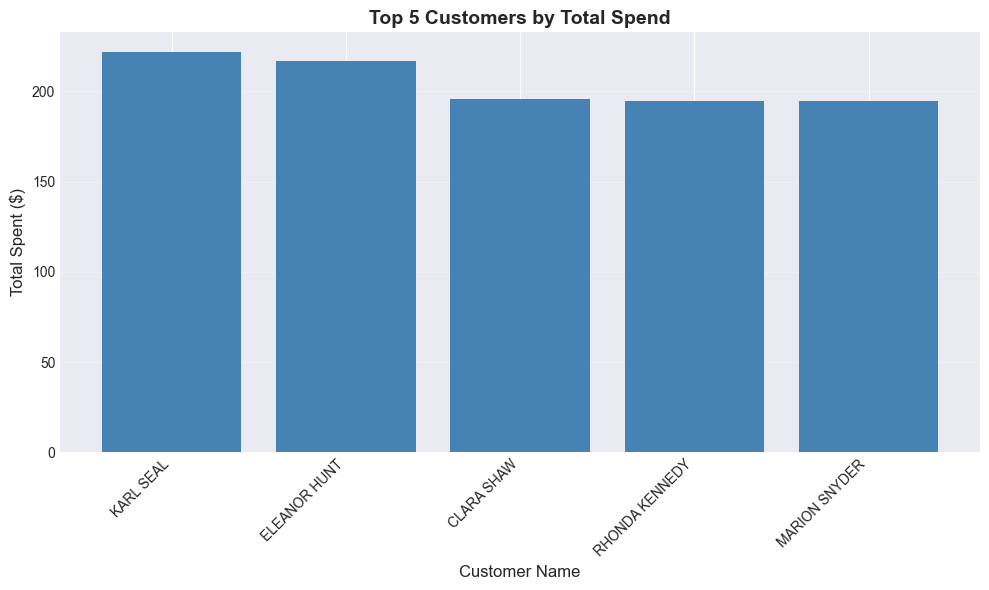

In [16]:
# Create bar chart for top 5 customers
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(top_customers['customer_name'], top_customers['total_spent'], color='steelblue')
plt.xlabel('Customer Name', fontsize=12)
plt.ylabel('Total Spent ($)', fontsize=12)
plt.title('Top 5 Customers by Total Spend', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**Observation:** Karl Seal is our most valuable customer with the highest total spending, followed by the other top 5 customers. These customers should be prioritized for special offers and loyalty programs.

### b) Revenue by film category

How much revenue does each film category generate? 

In [18]:
# Query for revenue per film category
query_2b = """
SELECT 
    c.name AS category,
    SUM(p.amount) AS total_revenue
FROM category c
JOIN film_category fc ON c.category_id = fc.category_id
JOIN film f ON fc.film_id = f.film_id
JOIN inventory i ON f.film_id = i.film_id
JOIN rental r ON i.inventory_id = r.inventory_id
JOIN payment p ON r.rental_id = p.rental_id
GROUP BY c.name
ORDER BY total_revenue DESC
"""

revenue_by_category = query_sakila(query_2b)
print("Revenue per film category:")
revenue_by_category

Revenue per film category:


,category,total_revenue
0,Sports,5314.21
1,Sci-Fi,4756.98
2,Animation,4656.30
3,Drama,4587.39
4,Comedy,4383.58
5,Action,4375.85
6,New,4351.62
7,Games,4281.33
8,Foreign,4270.67
9,Family,4226.07


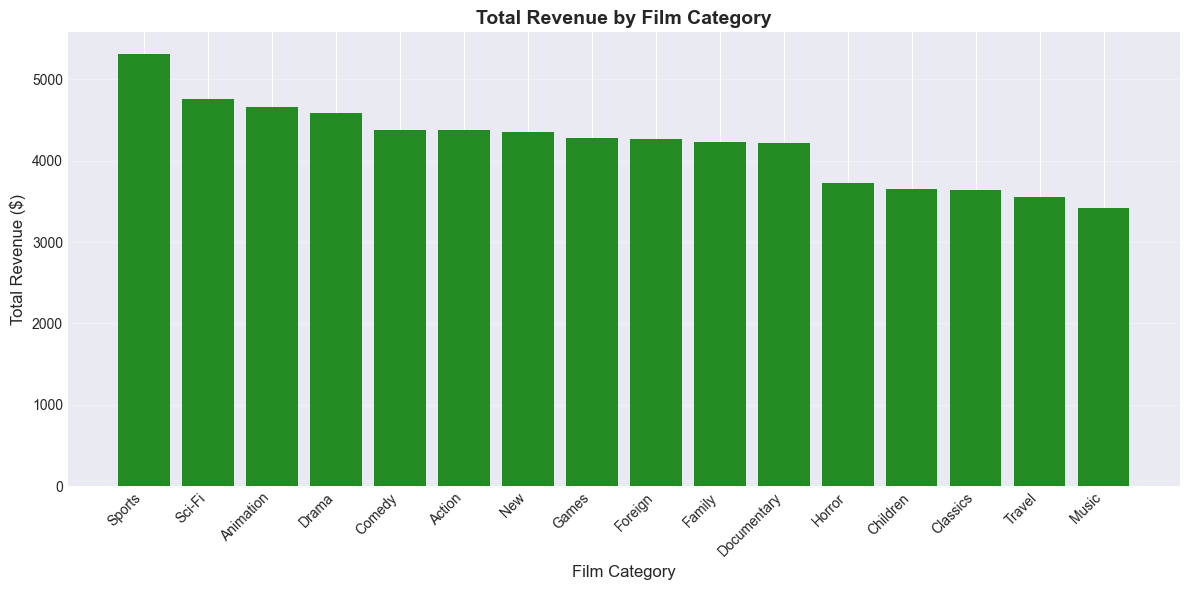

In [19]:
# Create bar chart for revenue per category
plt.figure(figsize=(12, 6))
plt.bar(revenue_by_category['category'], revenue_by_category['total_revenue'], color='forestgreen')
plt.xlabel('Film Category', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.title('Total Revenue by Film Category', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**Observation:** The Sports category generates the most revenue, which is consistent with it also having the most films. This shows a clear correlation between number of films and revenue per category.